In [1]:
from qd_rdf import get_dots, data_path, plot_rdf
import numpy as np

In [2]:
rdfs = []
R = []

In [4]:
L=2
dots=get_dots("132/2a.tif",compare=True,microns=L, size=5,spacing=6)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

FileNotFoundError: [Errno 2] No such file or directory: '/home/GWENWHITE/mse150projects/QD-Paper-RDF/132/2a.tif'

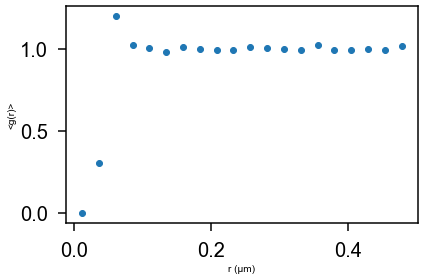

In [4]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


73.17617332646023


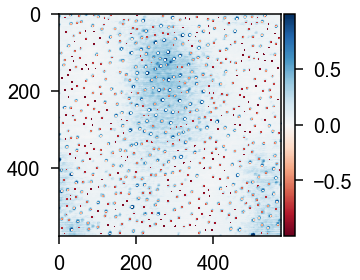

In [5]:

dots=get_dots2("132/2b.tif",compare=True,microns=L, size=5,spacing=6)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

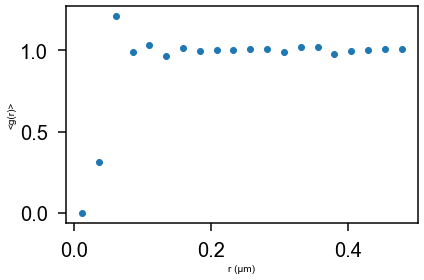

In [6]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])

73.87168551531177


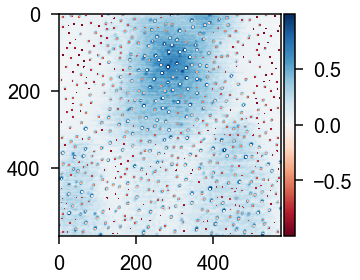

In [7]:

dots=get_dots2("132/2c.tif",compare=True,microns=L, size=5,spacing=6)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

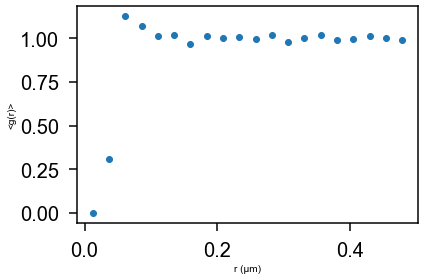

In [8]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])

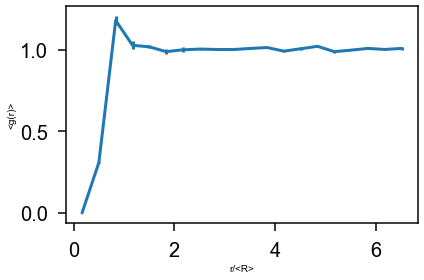

In [9]:
rdfs = np.asarray(rdfs)
mean_count = np.mean(rdfs,axis=0)
sem =  stats.sem(rdfs, axis=0, ddof=1)
r,rdf = plot_rdf(dots,L,plot=False)
plt.errorbar(1000*r/np.mean(R), mean_count, yerr=sem)
#plt.xlabel("r (μm)")
plt.xlabel("r/<R>")
plt.ylabel("<g(r)>")
plt.savefig("M132.png")
np.savetxt("M132.csv",(1000*r/np.mean(R),mean_count,sem),delimiter=',')
plt.show()

In [10]:
print(R)
print(np.mean(R),np.std(R))

[72.83570407292298, 73.17617332646023, 73.87168551531177]
73.29452097156498 0.431137264352372
